# Modelling Advanced LIGO

The previous notebooks we have been doing this week have all been leading up to us modelling **Advanced LIGO**! Hopefully you are happy with all the topics that were presented in the previous notebooks, as these tasks will require knowledge from all of them.

This notebook contains 4 tasks:
- Degree of freedom transfer functions
- Arm cavity and power recyling cavity bandwidth
- Resonant sideband extraction
- Noise coupling in Advanced LIGO

We will ask each group to present one of the tasks to all the others. Which tasks will be chosen at random, so between everyone in your group you have to have done all four!

## Getting Started

As usual, everyone should start by loading PyKat and the other Python packages we will need:

(type shift+enter to run)

In [22]:
from pykat import finesse        # import the whole pykat.finesse package
from pykat.commands import *     # import all packages in pykat.commands
import numpy as np               # for basic math/sci/array functions
import matplotlib.pyplot as plt  # for plotting

# tell the notebook to automatically show plots inline below each cell
%matplotlib inline               
# use pykat's plotting style. change dpi to change plot sizes on your screen
pykat.init_pykat_plotting(dpi=90,fmts=['png'])

# The Advanced LIGO model

Here we provide you with an Advanced LIGO model. It is a dual-recycled Fabry-Perot Michelson interferometer. It has two arm cavities, made up of the mirros `ITMX` and `ETMX`, and `ITMY` and `ETMY`.  There is also a power recycling mirror, `PRM`, and a signal recycling mirror `SRM`. You should familiarise yourself with the code for these mirrors as the tasks will require that you vary their parameters.

Make sure you run this next cell:

In [23]:
base = finesse.kat()
base.parse(""" 
l LI 125 0 nin
s s1 0 nin nprc1

# Power recycling mirror
m1 PRM 0.03 37.5u 90 nprc1 nprc2
s  sPRM 53 nprc2 nbsin

# Central beamsplitter
bs bs1 0.5 0.5 0 45 nbsin n0y n0x nbsout
 
# X-arm
s sx 4.50 n0x n1x
m1 ITMX 0.014 37.5u 90 n1x n2x
s sETMX 3995 n2x n3x
m1 ETMX 0 37.5u 90 n3x n4x

# Y-arm
s  sy 4.45 n0y n1y
m1 ITMY 0.014 37.5u 0 n1y n2y
s  sETMY 3995 n2y n3y
m1 ETMY 0 37.5u 0 n3y n4y
 
# Signal recycling mirror
s  sSRM 50.525 nbsout nsrc1
m1 SRM 0.2 37.5u 90 nsrc1 nout

# These commands give the mirrors a mass
# by default they are infinitely heavy
attr ITMX mass 40 
attr ETMX mass 40
attr ITMY mass 40
attr ETMY mass 40

# The code below here is what is known as a homodyne detector.
# Do not try and understand these commands! 
# We just use it as a convenient way to get QN and TF together.
l LO 1 0 90 nLO2
s sLO1 0 nout nLO3
bs bsLO 0.5 0.5 0 0 nLO3 nHD1 nHD2 nLO2
hd TF 180 nHD1 nHD2
qhd QN 180 nHD1 nHD2
""")

## Task Options

For all your tasks you should now use:
```python
kat = base.deepcopy()
```
to make a copy of this base model which you can then add your own commands to.

It's useful to 

<div style="background-color:#cceffc;padding:10px;">

### Task: Degrees of freedom transfer functions

This task will require you to model how the motion of three different mirror degrees of freedom affects the output signal.

**(a)** The LIGO model above already has a photodiode to measure the transfer function called `TF`. Plot the transfer function using the `TF` output and compute the transfer functions to the output for:
- differential ETMX and ETMY motions
- common ETMX and ETMY motions
- PRM motion
- SRM motion

The units of the transfer function should be [W/m]. Plot this over a frequency range from 1Hz to 10kHz in 1000 logarithimic steps.

**(b)** What do these transfer functions tell you about the interferometer?
</div>

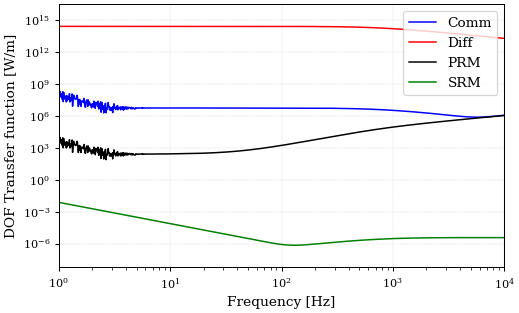

<div style="background-color:#cceffc;padding:10px;">

### Task: Radiation pressure

This task wants you to study how the radiation pressure noise behaves in LIGO.

**(a)** Add the `fsig` commands to generate a gravitational wave signal

**(b)** Plot the quantum noise limited sensitivity for three input laser powers:
- 12.5 W
- 125 W
- 1250 W

We have already added the detectors you should use to the model, `QN` is the quantum noise, and `TF` is the signal transfer function, so you do not need to add any new detectors for this task.  
Remember \begin{equation}S_q(f) = \frac{\mathtt{out[`qn`]}}{|H_s(f)|}\end{equation}  
Plot this over a frequency range from 1Hz to 10kHz in 1000 logarithimic steps.

**(c)** Why does the sensitivity of the detector change as it does in your plot?

**(d)** Usually we say that we make can our detectors more senstive by increasing the laser power. Is it possible to make this LIGO sensitive to gravitational wave with $h\sim10^{-24}$ at 10Hz just by increasing the laser power?
</div>

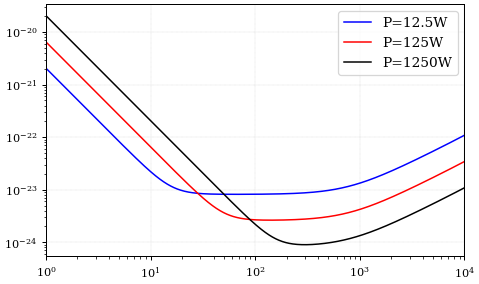

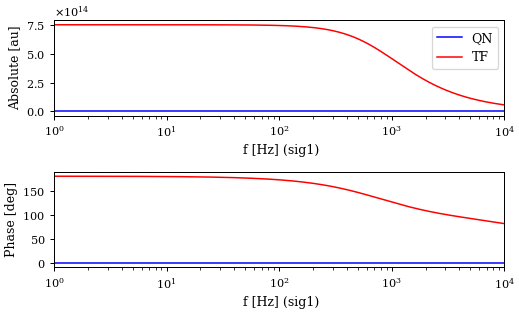

<div style="background-color:#cceffc;padding:10px;">

### Task: Arm cavity finesse and the bandwidth of the instrument

This task wants you to study how the finesse of the arm cavities affects the gravitational wave transfer function.
You should use the LIGO model provided above for this exercise.

**(a)** Add a photodiode, `pd`, to measure the circulating power in the x-arm cavity. Add the `fsig` commands to generate a gravitational wave signal

**(b)** Compute the GW signal transfer using the `TF` output already included in the LIGO model and plot it over a frequency range from 1Hz to 10kHz in 1000 logarithimic steps. Make a note of the power in the x-arm cavity.

**(c)** Now increase the finesse of the arm cavities, we do this by making the intput mirrors **more reflective**. Change `ITMY` and `ITMX` so that R=0.998 and T=0.002.

**(d)** Compute how much power is now in the x-arm. Why does the power increase? Change the input laser so that you now have the same power in the x-arm as you did in (b). You must do this to make a fair comparison.

**(e)** Again, compute the GW signal transfer using the `TF` output from the model using the high finesse cavities. Plot this on the same figure as your result from (b).

**(f)** What affect on the GW signal transfer function does increasing the arm cavity finesse have?

**(g)** Would making the finesse very high be good for detecting a wide range of GW signals?
</div>

<div style="background-color:#cceffc;padding:10px;">

### Task: Signal recycling mirror (SRM)

This task aims show how the **signal recycling cavity** changes the detector. To do this we will look at how the gravitational wave signal transfer function changes when we add and remove the SRM. You should use the LIGO model provided above for this exercise.

**(a)** Add a photodiode, `pd`, to measure the circulating power in the x-arm cavity. Add the `fsig` commands to generate a gravitational wave signal

**(b)** The model has the SRM included by default. Compute the GW signal transfer using the `TF` output already included in the LIGO model and plot it over a frequency range from 1Hz to 10kHz in 1000 logarithimic steps.

**(c)** Make the SRM 100% transparent, this effectively removes it as it no longer has any affect on the optical fields. Compute the GW signal transfer function again and plot it on the same figure you made in (c)

**(d)** How does the SRM change the detector's ability to sense GW signals?

**(e)** Does having the SRM affect the power in the arm cavities?
</div>

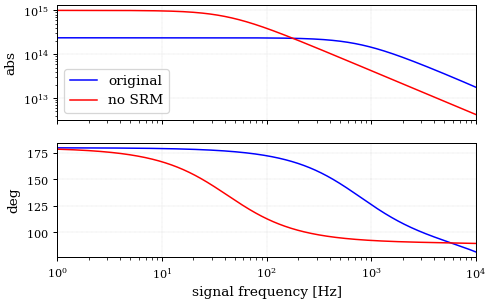

original power = 804706.790391937W
no-SRM power   = 804706.790391937W
